In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random


dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values
n_data = data.shape[0]
x = data[:, 0]
y = data[:, 1]

label = np.array([random.randint(0,4) for i in range(n_data)]).reshape(n_data, 1)
initial_label = label.copy()

class0 = (label[:, 0] == 0)
class1 = (label[:, 0] == 1)
class2 = (label[:, 0] == 2)
class3 = (label[:, 0] == 3)
class4 = (label[:, 0] == 4)

init_class0 = class0.copy()
init_class1 = class1.copy()
init_class2 = class2.copy()
init_class3 = class3.copy()
init_class4 = class4.copy()

In [20]:
def compute_distance(a, b):
    
    dist = math.sqrt( (a[0] - b[0])**2 + (a[1] - b[1])**2 ) #distance between a and b#
    return dist

def compute_centroid(Z):

    center = np.zeros(shape = (5, 2), dtype = np.float64)  #centroid of a set of points in P#
    
    for i in range(n_data):
        center[label[i].item()][0] += Z[i][0]
        center[label[i].item()][1] += Z[i][1]
        
    if np.sum(class0) != 0:
        center[0] /= np.sum(class0)
    
    if np.sum(class1) != 0:
        center[1] /= np.sum(class1)
        
    if np.sum(class2) != 0:
        center[2] /= np.sum(class2)
        
    if np.sum(class3) != 0:
        center[3] /= np.sum(class3)
        
    if np.sum(class4) != 0:
        center[4] /= np.sum(class4)

    return center

def compute_label(z, M):
    label = np.zeros(shape =(n_data, 1), dtype = np.int64) #label of point z with a set of centroids M#
    
    for i in range(n_data):
        dist = np.zeros(shape = (5, 1), dtype = np.float64)
        dest = z[i]
        
        for j in range(5):
            dist[j] = compute_distance(dest, centroid[j]);
        label[i] = dist.argmin()
        
    class0 = (label[: , 0] == 0)
    class1 = (label[: , 0] == 1)
    class2 = (label[: , 0] == 2)
    class3 = (label[: , 0] == 3)
    class4 = (label[: , 0] == 4)
    
    return label

def compute_loss(C, M):
    loss = 0
    for i in range(n_data):
        loss += compute_distance(C[i], M[label[i].item()])
    return loss

def centroid_of_cluster(c):
    distance = np.zeros(shape=(5, 1), dtype = np.float64)
    
    for i in range(5):
        distance[i] = compute_distance([0, 0], c[i])
    return distance


    

In [21]:
n_iter = 100
centroid_cluster = np.empty((100, 5, 1))
L_iters = []

centroid = compute_centroid(data)
initial_c = centroid.copy()

In [22]:
for i in range(n_iter):
    L_iters.append(compute_loss(data, centroid))
    centroid_cluster[i] = centroid_of_cluster(centroid)
    label = compute_label(data, centroid)
    centroid = compute_centroid(data)
    

1. Plot the data points

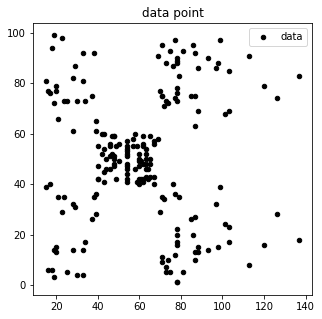

In [10]:
plt.figure(1, figsize = (5, 5))
plt.scatter(x, y, c = 'black', s = 80, marker = '.', label = 'data')
plt.title('data point')
plt.legend()
plt.show()

NameError: name 'inital_c' is not defined

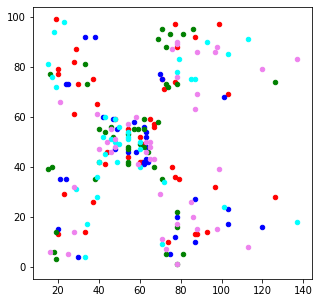

In [23]:
plt.figure(1, figsize = (5, 5))
plt.scatter(x[init_class0], y[init_class0], c='red', s=80, marker='.', label='Cluster 1')
plt.scatter(x[init_class1], y[init_class1], c='blue', s=80, marker='.', label='Cluster 2')
plt.scatter(x[init_class2], y[init_class2], c='green', s=80, marker='.', label='Cluster 3')
plt.scatter(x[init_class3], y[init_class3], c='cyan', s=80, marker='.', label='Cluster 4')
plt.scatter(x[init_class4], y[init_class4], c='violet', s=80, marker='.', label='Cluster 5')
plt.scatter(initial_c[:, 0], inital_c[:, 1], c='black', s=200, marker='+', label='Centroids')   
plt.title('Initial cluster')
plt.show()